In [121]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('data/RV_O_010_R_SR_SK.CSV', sep=';')
df.head()

,Kód štátu,Názov štátu,Pohlavie,Ekonomické vekové skupiny,Vzdelanie,abs.
0,SK0,Slovenská republika,muž,predproduktívny vek (0-14 rokov),nezistené,6301
1,SK0,Slovenská republika,muž,predproduktívny vek (0-14 rokov),základné vzdelanie (bližšie neuvedené),1
2,SK0,Slovenská republika,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 1. stupeň základnej školy,117157
3,SK0,Slovenská republika,muž,predproduktívny vek (0-14 rokov),základné vzdelanie - 2. stupeň základnej školy,66
4,SK0,Slovenská republika,muž,predproduktívny vek (0-14 rokov),bez ukončeného vzdelania – osoby vo veku 0-14 ...,320751


In [123]:
df.describe()

,abs.
count,92.000000
mean,59231.195652
std,93806.632238
min,1.000000
25%,2671.250000
50%,16727.500000
75%,77318.000000
max,400487.000000


In [124]:
# # Pohlavie
display(df.groupby('Pohlavie')['abs.'].sum())

Pohlavie
muž     2665376
žena    2783894
Name: abs., dtype: int64

In [125]:
# # Vzdelanie
display(df.groupby('Vzdelanie')['abs.'].sum())

Vzdelanie
bez ukončeného vzdelania – osoby vo veku 0-14 rokov                                                      623199
bez školského vzdelania – osoby vo veku 15 rokov a viac                                                   14987
nezistené                                                                                                226004
stredné odborné (učňovské) vzdelanie bez maturity (bližšie neuvedené)                                      6833
stredné odborné (učňovské) vzdelanie bez maturity a bez výučného listu (zaškolenie, zaučenie)             90310
stredné odborné (učňovské) vzdelanie bez maturity s vysvedčením o záverečnej skúške                      112295
stredné odborné (učňovské) vzdelanie bez maturity s výučným listom                                       837915
vysokoškolské vzdelanie (bližšie neuvedené)                                                                 444
vysokoškolské vzdelanie - 1. stupeň (Bc.)                                                     

In [126]:
df.groupby('Ekonomické vekové skupiny').size()

Ekonomické vekové skupiny
poproduktívny vek (65 a viac rokov)    41
predproduktívny vek (0-14 rokov)        9
produktívny vek (15-64 rokov)          42
dtype: int64

In [127]:
productive_age = df[df['Ekonomické vekové skupiny']=='produktívny vek (15-64 rokov)']
productive_age.head()

,Kód štátu,Názov štátu,Pohlavie,Ekonomické vekové skupiny,Vzdelanie,abs.
5,SK0,Slovenská republika,muž,produktívny vek (15-64 rokov),nezistené,108406
6,SK0,Slovenská republika,muž,produktívny vek (15-64 rokov),základné vzdelanie (bližšie neuvedené),2937
7,SK0,Slovenská republika,muž,produktívny vek (15-64 rokov),základné vzdelanie - 1. stupeň základnej školy,44458
8,SK0,Slovenská republika,muž,produktívny vek (15-64 rokov),základné vzdelanie - 2. stupeň základnej školy,199375
9,SK0,Slovenská republika,muž,produktívny vek (15-64 rokov),stredné odborné (učňovské) vzdelanie bez matur...,5146


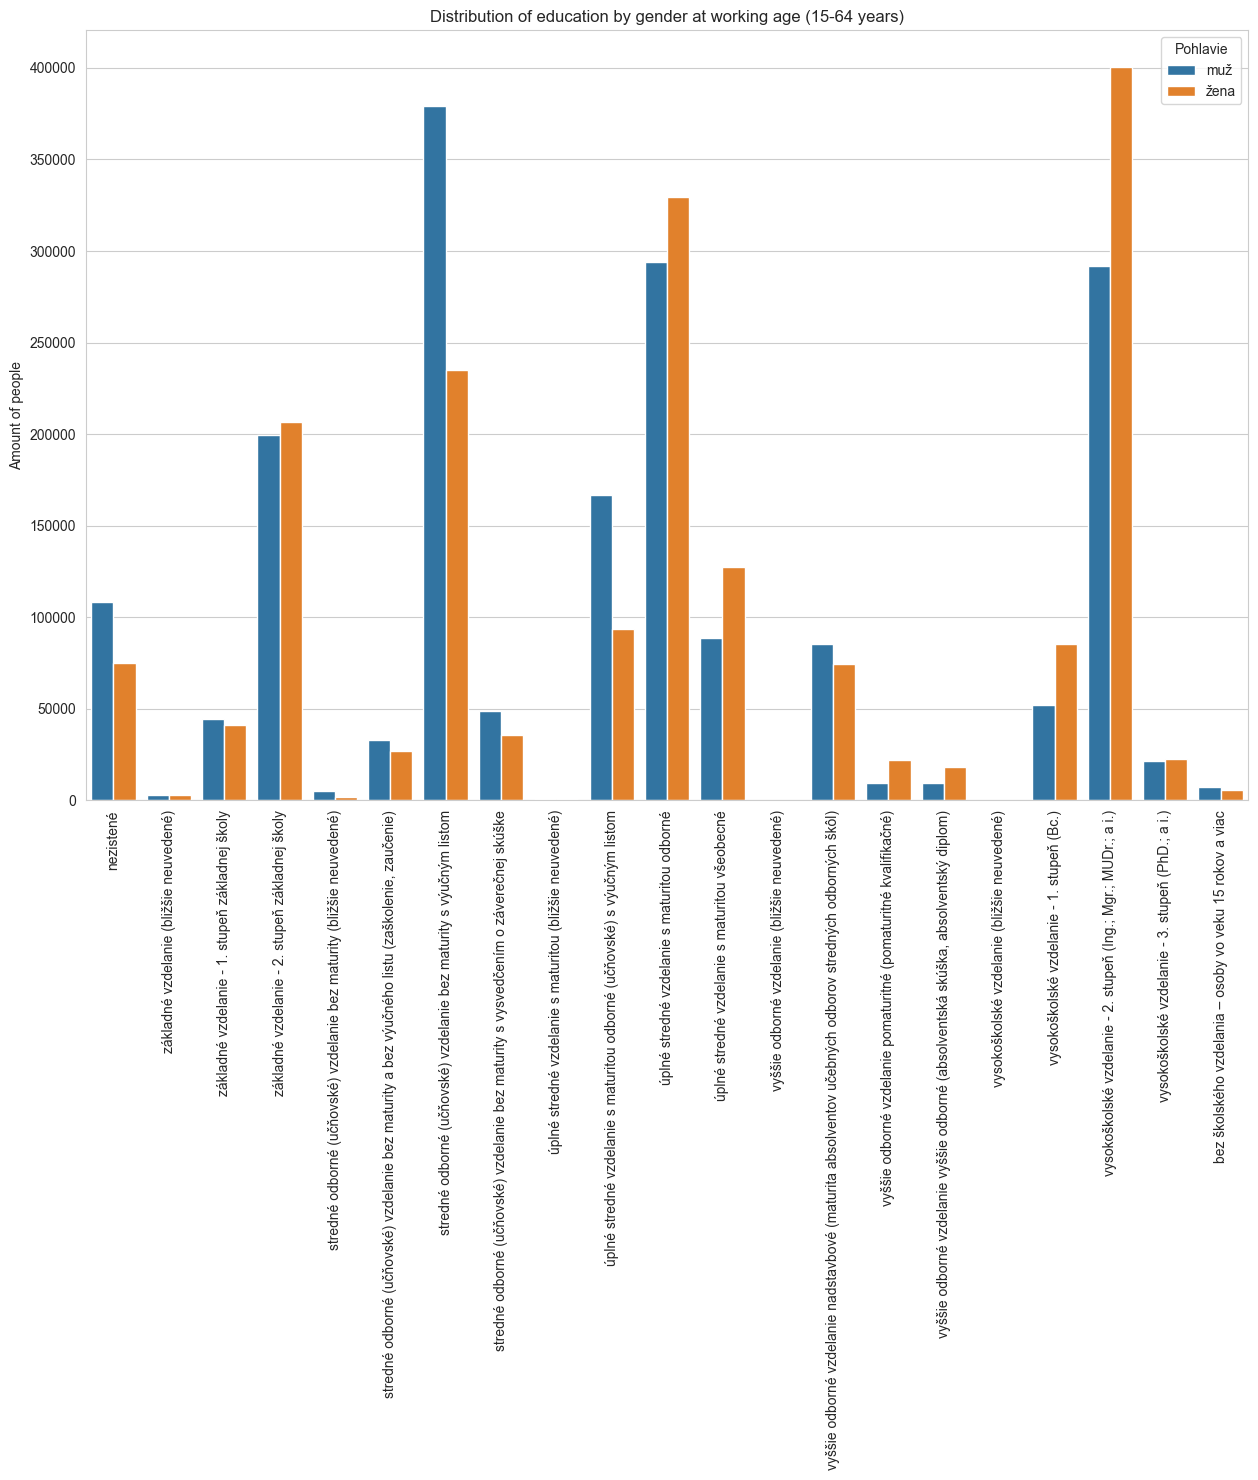

In [134]:
sns.set_style("whitegrid")
f = plt.figure(figsize=(15, 10))
axes = sns.barplot(data=productive_age, 
                   x='Vzdelanie', y='abs.', hue='Pohlavie')
axes.tick_params(axis='x', labelrotation=90)
axes.set_title('Distribution of education by gender at working age (15-64 years)')
axes.set_xlabel(None)
axes.set_ylabel("Amount of people")
pass